In [18]:
import pandas as pd
import numpy as np
from pathlib import Path

## Fetch Data

In [4]:
import utils.data_utils as data_utils

DATA_DIR = Path.cwd().parent / "data"
train, test = data_utils.load_swift_data(DATA_DIR)
bank_data = data_utils.load_bank_data(DATA_DIR)

In [7]:
train.head()

,Timestamp,UETR,Sender,Receiver,TransactionReference,OrderingAccount,OrderingName,OrderingStreet,OrderingCountryCityZip,BeneficiaryAccount,BeneficiaryName,BeneficiaryStreet,BeneficiaryCountryCityZip,SettlementDate,SettlementCurrency,SettlementAmount,InstructedCurrency,InstructedAmount,Label
MessageId,,,,,,,,,,,,,,,,,,,
TRA7CGN3FF,2022-01-01,f474fdb3-4675-4fff-ab7e-3469f82bd6a7,DPSUFRPP,ABVVUS6S,PETX22-FXIDA-7054,FR90714755422956984353,PHACELIA HETEROPHYLLA,3| RUE HAMON,FR/42859 SAINTE AURÉLIE,611024064274704358,PAPAVER CALIFORNICUM,2584 CHARLES PLACE,US/ROJASLAND| DC 58442,220101,USD,1.746319e+09,EUR,1.560189e+09,0
TRPNEMZIR7,2022-01-01,c9158def-dab1-4bfb-a31f-7f51c6679d60,BRRGPTPL,CBLHESMM,PETX22-NO-FX-1736,PT8895792452733129969,GONOLOBUS STEPHANOTRICHUS,AV RITA ALVES| 60,PT/5863-752 CANTANHEDE,ES61897100852916932423,MINUARTIA NUTTALLII-GREGARIA,ACCESO DE CARMINA ARAGÓN 83 PUERTA 4,ES/ÁVILA| 02281,220101,EUR,4.711420e+06,EUR,4.711420e+06,0
TR6S6A5JYL,2022-01-01,d371ba0a-823f-4243-98ba-94ff18523420,BRRGPTPL,CBLHESMM,PETX22-NO-FX-1687,PT92895792452733126420,LECHEA INTERMEDIA-INTERMEDIA,PRAÇA VALENTE| 85,PT/1100-087 BARCELOS,ES31897100852916935097,ASTRAGALUS MAGDALENAE,PASADIZO ANÍBAL LUJÁN 57,ES/SEGOVIA| 40727,220101,EUR,7.528216e+05,EUR,7.528216e+05,0
TRT4VPEHAK,2022-01-01,5a53a257-4dc9-4800-abb2-4cd1d55c8345,DPSUFRPP,ABVVUS6S,DPSU22-FXIYA-517,358727697099645998,SCLERANTHUS,341 4 CHOME 4 BAN 2 GO,JP/FUKUOKA PREFECTURE|ŌKAWA,611024064274698543,SYNGONIUM PODOPHYLLUM,7864 MORRIS MEWS APT. 464,US/DPO AE 78549,220101,USD,6.371209e+06,JPY,6.490487e+08,0
TRTADQPGAV,2022-01-01,f27867ac-35e2-46af-8248-0a2d0d9bf00d,DPSUFRPP,ABVVUS6S,PETX22-FXIDA-11878,FR71714755422956985471,SELAGINELLA ASPRELLA,28| BOULEVARD LÉVÊQUE,FR/36357 TURPIN,611024064274707099,GALACTIA PARVIFOLIA,363 ROBERT GARDENS,US/NEW KAREN| MS 49461,220101,USD,5.179423e+06,EUR,4.627377e+06,0


In [10]:
bank_data.head()

,Bank,Account,Name,Street,CountryCityZip,Flags
0,ABVVUS6S,611024064274690946,OXYTROPIS PODOCARPA,784 YANG PASSAGE,"US/NEW SHANNON, IA 49432",0
1,ABVVUS6S,611024064274690947,VIOLA ◊ESCULENTA,786 CINDY HARBOR,US/APO AP 02202,0
2,ABVVUS6S,611024064274690948,CROSSOSOMA CALIFORNICUM,235 JAMES VIEWS SUITE 206,"US/ORRVILLE, LA 49084",0
3,ABVVUS6S,611024064274690949,HYDROCOTYLE PROLIFERA,270 THERESA MILL,"US/WEST JAYSHIRE, WA 67409",0
4,ABVVUS6S,611024064274690950,CHAMAEMELUM FUSCATUM,20734 ISAIAH BURG,"US/KINGVIEW, CO 71032",0


### merge data

### Features

In [12]:
%%time
# Hour
train["hour"] = train["Timestamp"].dt.hour
test["hour"] = test["Timestamp"].dt.hour

# Hour frequency for each sender
senders = train["Sender"].unique()
train["sender_hour"] = train["Sender"] + train["hour"].astype(str)
test["sender_hour"] = test["Sender"] + test["hour"].astype(str)
sender_hour_frequency = {}
for s in senders:
    sender_rows = train[train["Sender"] == s]
    for h in range(24):
        sender_hour_frequency[s + str(h)] = len(sender_rows[sender_rows["hour"] == h])

train["sender_hour_freq"] = train["sender_hour"].map(sender_hour_frequency)
test["sender_hour_freq"] = test["sender_hour"].map(sender_hour_frequency)

In [13]:
%%time
# Sender-Currency Frequency and Average Amount per Sender-Currency
train["sender_currency"] = train["Sender"] + train["InstructedCurrency"]
test["sender_currency"] = test["Sender"] + test["InstructedCurrency"]

sender_currency_freq = {}
sender_currency_avg = {}

for sc in set(
    list(train["sender_currency"].unique()) + list(test["sender_currency"].unique())
):
    sender_currency_freq[sc] = len(train[train["sender_currency"] == sc])
    sender_currency_avg[sc] = train[train["sender_currency"] == sc][
        "InstructedAmount"
    ].mean()

train["sender_currency_freq"] = train["sender_currency"].map(sender_currency_freq)
test["sender_currency_freq"] = test["sender_currency"].map(sender_currency_freq)

train["sender_currency_amount_average"] = train["sender_currency"].map(
    sender_currency_avg
)
test["sender_currency_amount_average"] = test["sender_currency"].map(sender_currency_avg)

CPU times: total: 20.1 s
Wall time: 20.1 s


In [14]:
%%time
# Sender-Receiver Frequency
train["sender_receiver"] = train["Sender"] + train["Receiver"]
test["sender_receiver"] = test["Sender"] + test["Receiver"]

sender_receiver_freq = {}

for sr in set(
    list(train["sender_receiver"].unique()) + list(test["sender_receiver"].unique())
):
    sender_receiver_freq[sr] = len(train[train["sender_receiver"] == sr])

train["sender_receiver_freq"] = train["sender_receiver"].map(sender_receiver_freq)
test["sender_receiver_freq"] = test["sender_receiver"].map(sender_receiver_freq)

CPU times: total: 23.7 s
Wall time: 23.7 s


In [15]:
columns_to_drop = [
    "UETR",
    "Sender",
    "Receiver",
    "TransactionReference",
    "OrderingAccount",
    "OrderingName",
    "OrderingStreet",
    "OrderingCountryCityZip",
    "BeneficiaryAccount",
    "BeneficiaryName",
    "BeneficiaryStreet",
    "BeneficiaryCountryCityZip",
    "SettlementDate",
    "SettlementCurrency",
    "InstructedCurrency",
    "Timestamp",
    "sender_hour",
    "sender_currency",
    "sender_receiver",
]

train_sub = train.drop(columns_to_drop, axis=1)
test_sub = test.drop(columns_to_drop, axis=1)
train_sub.head(3)

,SettlementAmount,InstructedAmount,Label,hour,sender_hour_freq,sender_currency_freq,sender_currency_amount_average,sender_receiver_freq
MessageId,,,,,,,,
TRA7CGN3FF,1.746319e+09,1.560189e+09,0,0,16519,1598751,1.692465e+08,1708051
TRPNEMZIR7,4.711420e+06,4.711420e+06,0,0,4214,36690,1.667354e+06,36690
TR6S6A5JYL,7.528216e+05,7.528216e+05,0,0,4214,36690,1.667354e+06,36690


### PCA

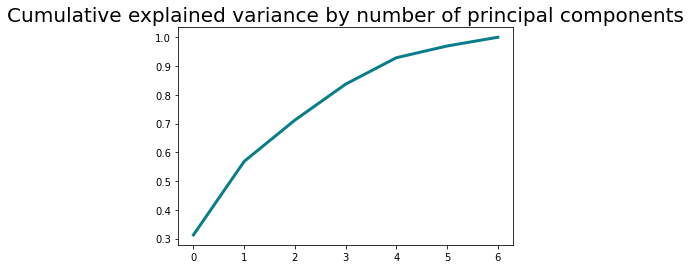

In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

train_sub_pca = train_sub.drop(['Label'],axis=1)
scaler = StandardScaler()
scaler.fit(train_sub_pca)

X_train = scaler.transform(train_sub_pca)
pca = PCA(n_components=7).fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [42]:
pca.explained_variance_ratio_

array([0.31288719, 0.25560167, 0.14347123, 0.12503169, 0.09181146,
       0.04076424, 0.03043253])

In [43]:
pca.singular_values_

array([3205.59892525, 2897.3244989 , 2170.68948188, 2026.40075608,
       1736.45581767, 1157.05751102,  999.73373302])

In [46]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(str(i)) for i in range(1, 8)], index=train_sub_pca.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
SettlementAmount,0.140739,0.650102,0.084600,0.247766,0.007012,-0.698919,-0.021858
InstructedAmount,0.152309,0.656384,0.066900,0.181124,0.004159,0.712840,0.022859
hour,0.072633,0.008713,-0.959724,0.264284,-0.056146,-0.001066,0.024063
sender_hour_freq,-0.467038,0.130648,-0.104738,-0.064141,0.859485,0.003963,-0.104842
sender_currency_freq,-0.583913,0.144563,-0.039087,-0.015648,-0.427421,0.023372,-0.673156
sender_currency_amount_average,0.190517,0.283004,-0.231680,-0.907721,-0.040817,-0.047211,-0.045652
sender_receiver_freq,-0.596945,0.168503,-0.033522,-0.087429,-0.271499,-0.024061,0.729524
